In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

In [2]:
from datetime import timedelta, datetime

import numpy as np
import yfinance as yf

In [11]:
spy_data = yf.download(tickers='SPY', period='30y', interval='1d', auto_adjust=True, prepost=False)
spy_daily_returns = (spy_data['Close'] / spy_data['Close'].shift(1) - 1)[1:]
spy_daily_returns.head()

[*********************100%***********************]  1 of 1 downloaded


Date
1993-02-01    0.007183
1993-02-02    0.002252
1993-02-03    0.010487
1993-02-04    0.004077
1993-02-05   -0.000738
Name: Close, dtype: float64

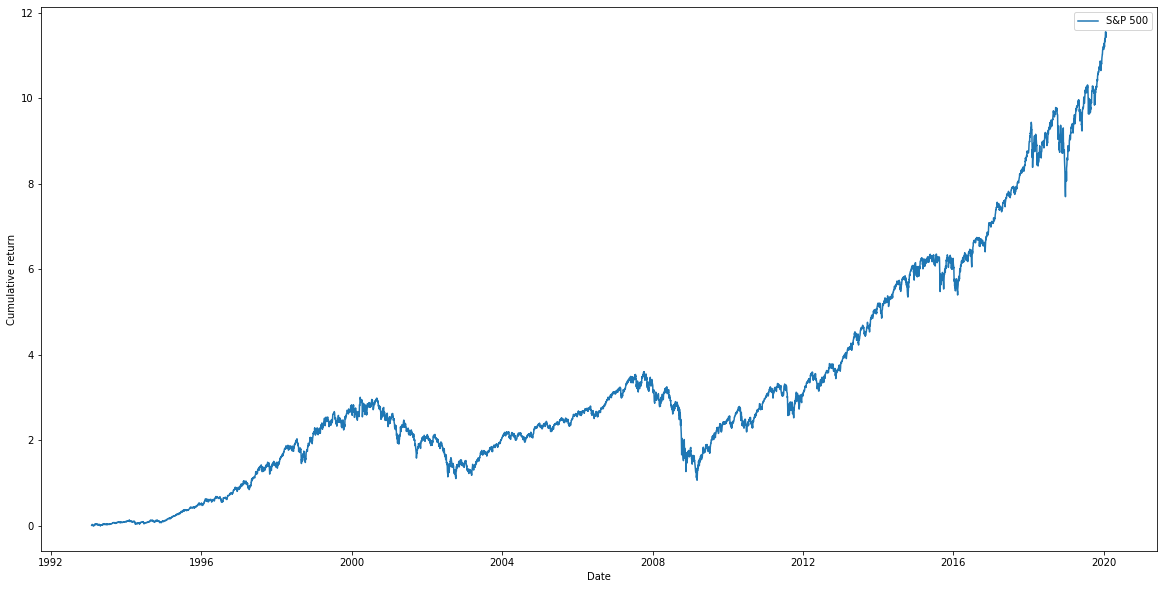

In [12]:
plt.figure(figsize=(20, 10))
plt.plot(np.cumprod(spy_daily_returns + 1) - 1, label='S&P 500')
plt.xlabel('Date')
plt.ylabel('Cumulative return')
plt.legend()
plt.show()

In [20]:
YEAR_BARS = 252
TEST_YEARS = 10
# TRAIN_END_DATE = spy_data.index.max() - timedelta(days=TEST_YEARS * 365)
TRAIN_END_DATE = datetime(2003, 1, 1)
TEST_END_DATE = TRAIN_END_DATE + timedelta(days=TEST_YEARS*365)

spy_train = spy_daily_returns[(spy_daily_returns.index < TRAIN_END_DATE)].fillna(0)
spy_test = spy_daily_returns[(spy_daily_returns.index >= TRAIN_END_DATE) & (spy_daily_returns.index <= TEST_END_DATE)].fillna(0)
print(spy_train.index.min(), spy_train.index.max())
print(spy_test.index.min(), spy_test.index.max())

1993-02-01 00:00:00 2002-12-31 00:00:00
2003-01-02 00:00:00 2012-12-28 00:00:00


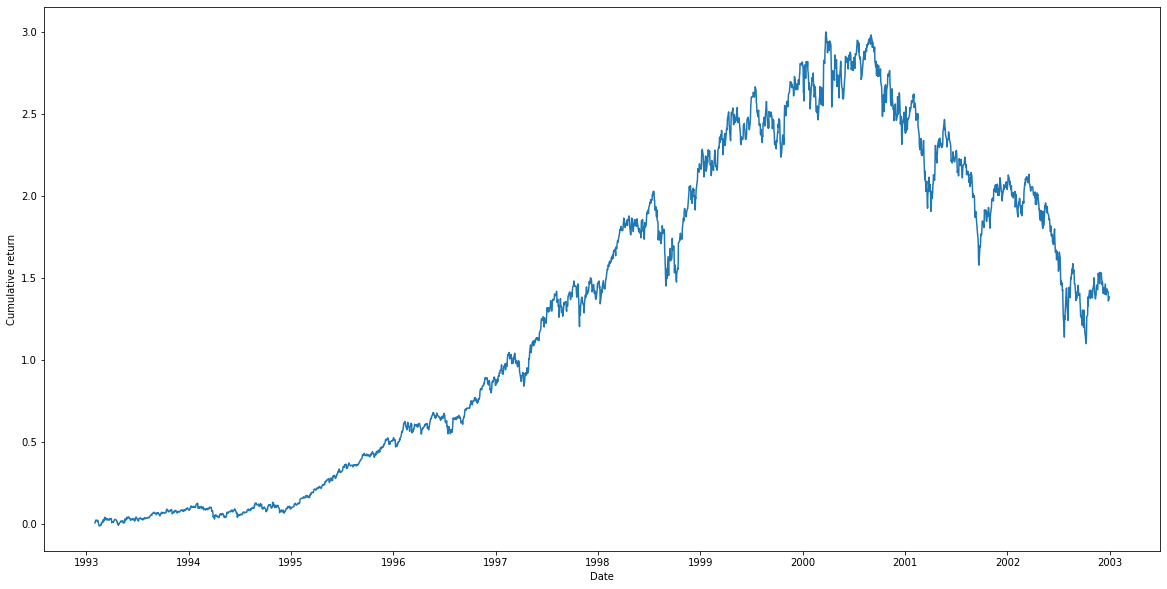

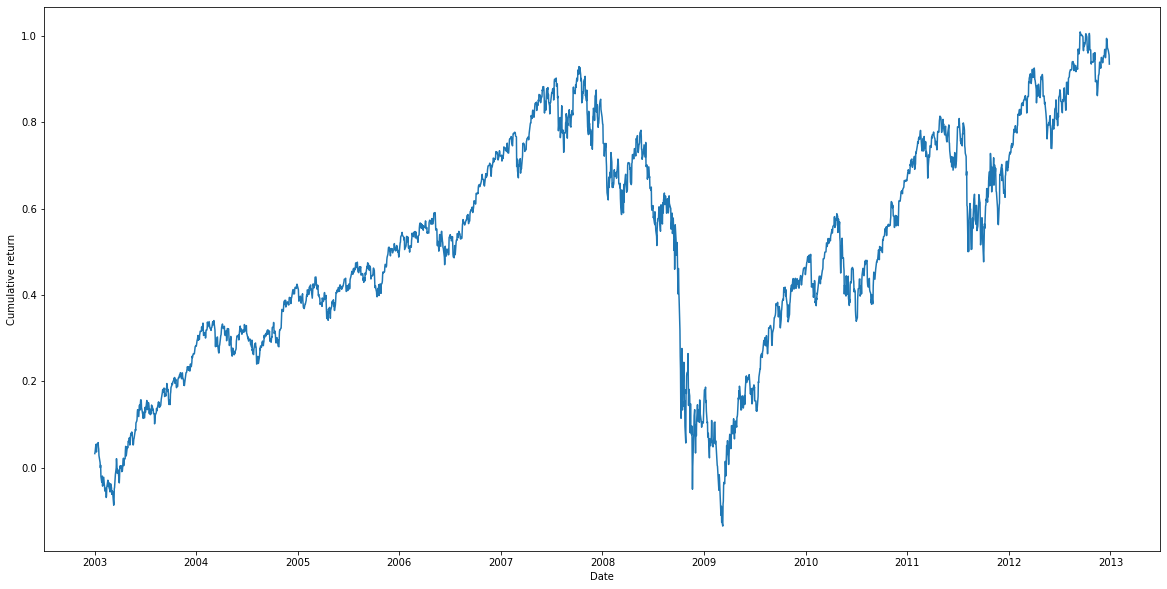

In [22]:
plt.figure(figsize=(20,10))
plt.plot(np.cumprod(1 + spy_train) - 1)
plt.xlabel('Date')
plt.ylabel('Cumulative return')
plt.show()

plt.figure(figsize=(20,10))
plt.plot(np.cumprod(1 + spy_test) - 1)
plt.xlabel('Date')
plt.ylabel('Cumulative return')
plt.show()

In [23]:
from optfolio.returns_projection import sample_returns, mcmc_sample_returns
from optfolio.report import plot_traces, returns_table

### S&P 500 MC Projection

In [24]:
spy_traces = sample_returns(spy_train, 10 * 252, n_traces=100000)

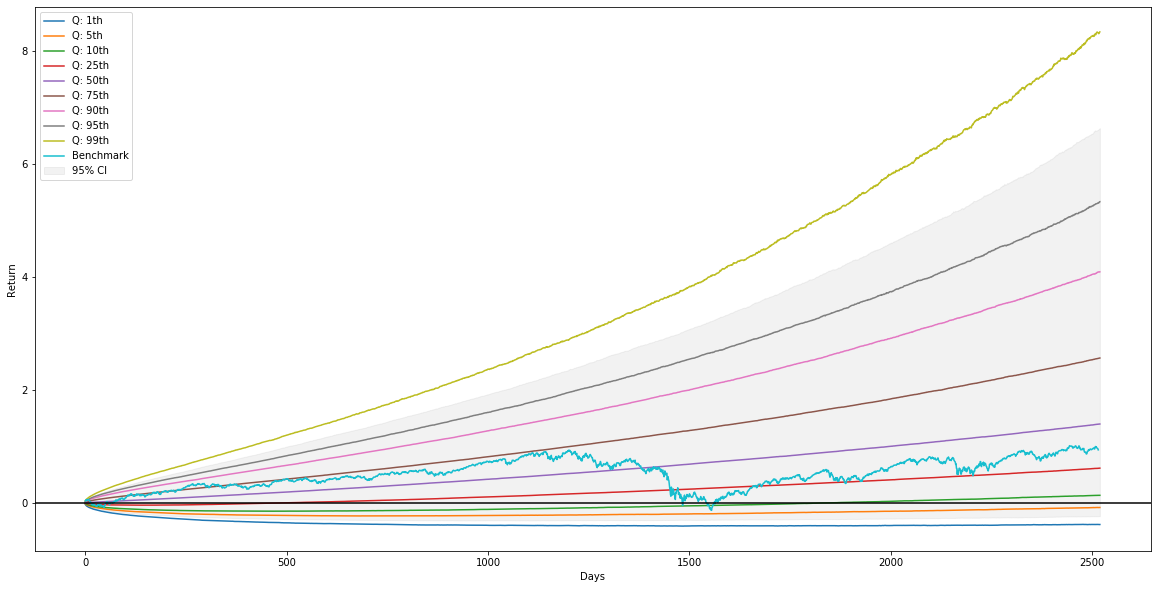

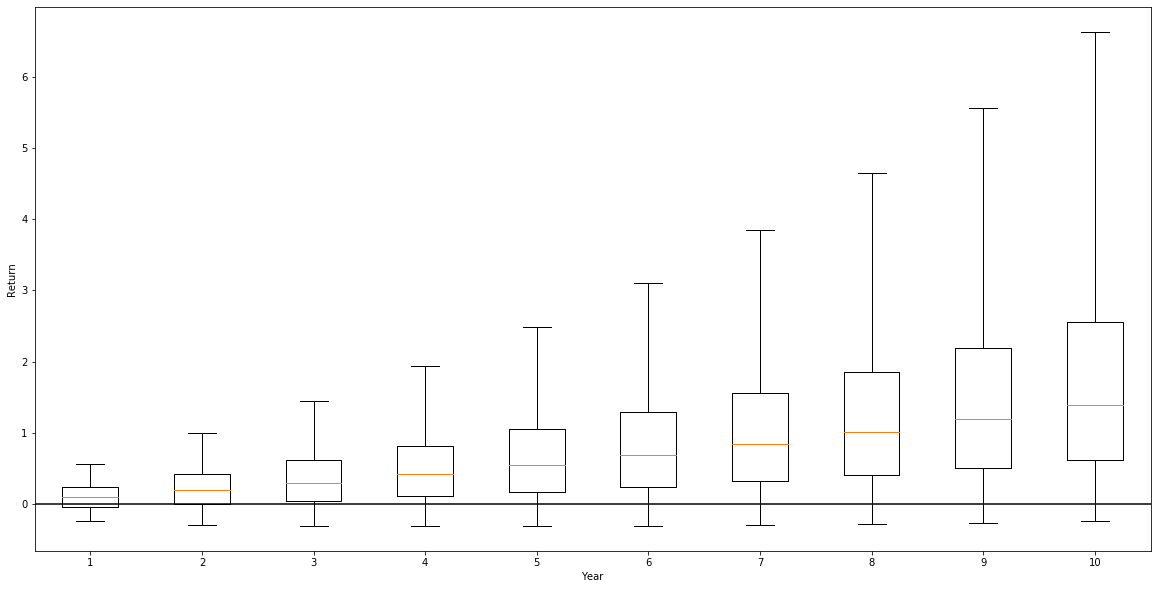

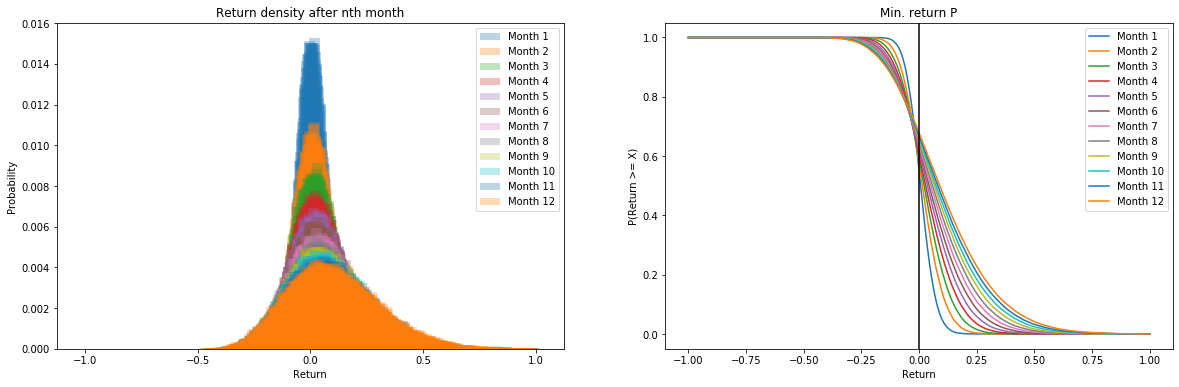

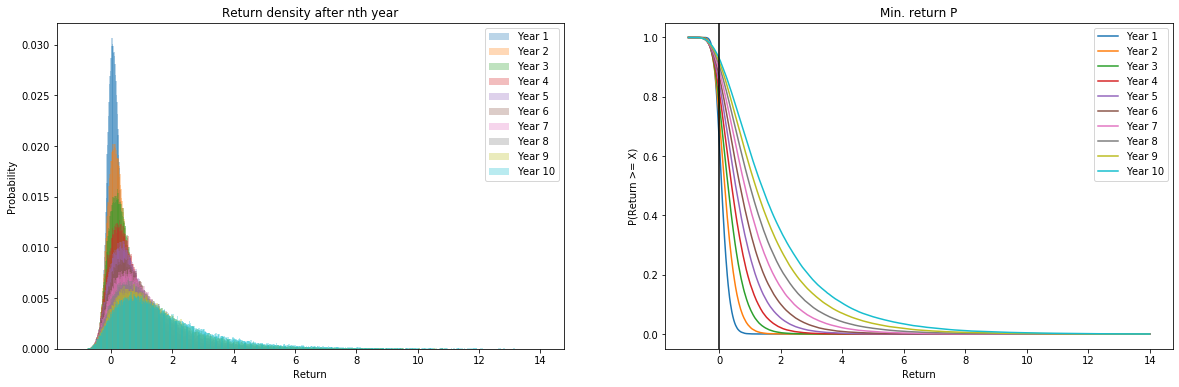

,< 0,> 0,>= 1,>= 2,>= 3,>= 4,>= 5,>= 6,>= 7,>= 8,>= 9,>= 10
Year,,,,,,,,,,,,
1,31.940,68.060,0.049,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,25.279,74.721,2.491,0.018,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,20.912,79.088,8.896,0.474,0.019,0.005,0.000,0.000,0.000,0.000,0.000,0.000
4,17.243,82.757,17.621,2.188,0.249,0.032,0.001,0.000,0.000,0.000,0.000,0.000
5,14.642,85.358,26.764,5.477,1.116,0.260,0.046,0.007,0.000,0.000,0.000,0.000
6,12.295,87.705,35.433,10.198,2.870,0.834,0.285,0.088,0.024,0.010,0.002,0.000
7,10.656,89.344,43.256,15.934,5.698,2.117,0.829,0.339,0.130,0.057,0.022,0.012
8,9.087,90.913,50.376,22.188,9.532,4.173,1.933,0.913,0.429,0.202,0.108,0.048
9,7.892,92.108,56.459,28.753,14.103,7.060,3.594,1.886,1.008,0.575,0.313,0.180


In [25]:
spy_cum_returns = plot_traces(spy_traces, benchmark_returns=spy_test.values)
returns_table(spy_cum_returns)